In [5]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset
from filter import filter

In [6]:
data_directory = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'

cat_directory = './space_apps_2024_seismic_detection/data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

In [7]:
# How long should the short-term and long-term window be, in seconds?
sta_len = 5000
lta_len = 40000

# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 2.3
thr_off = 1.5

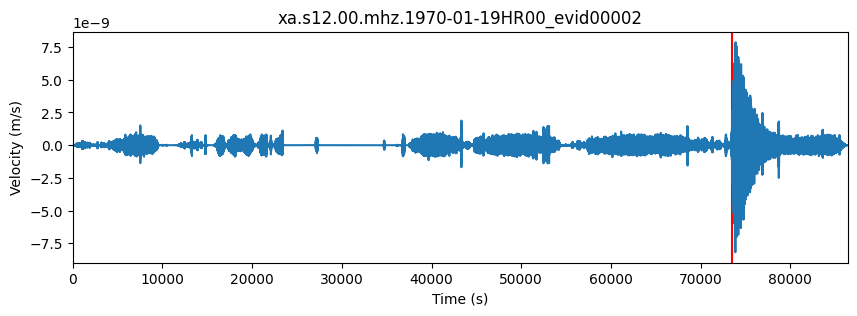

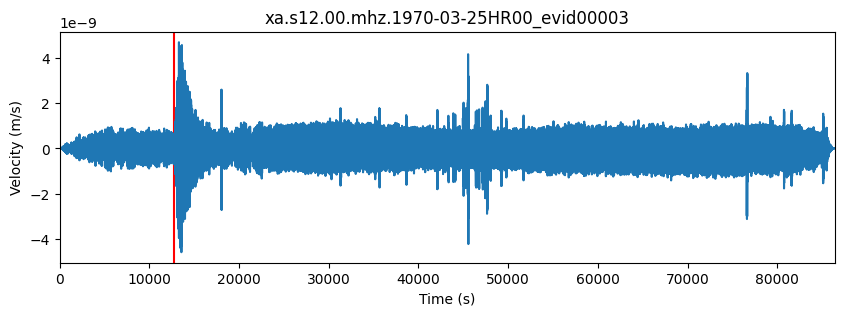

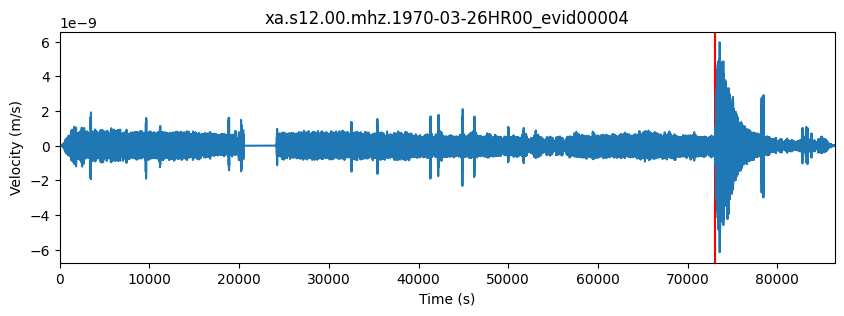

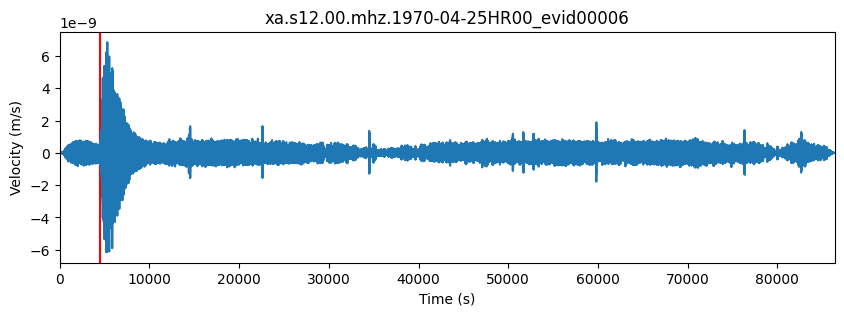

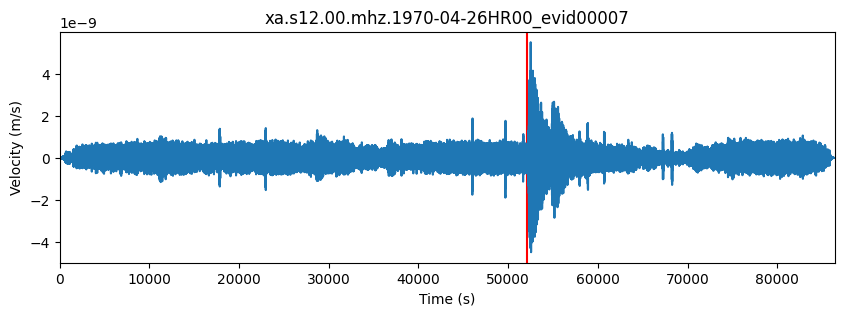

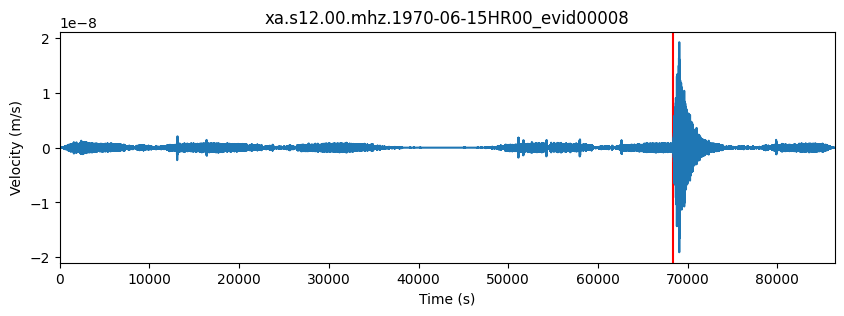

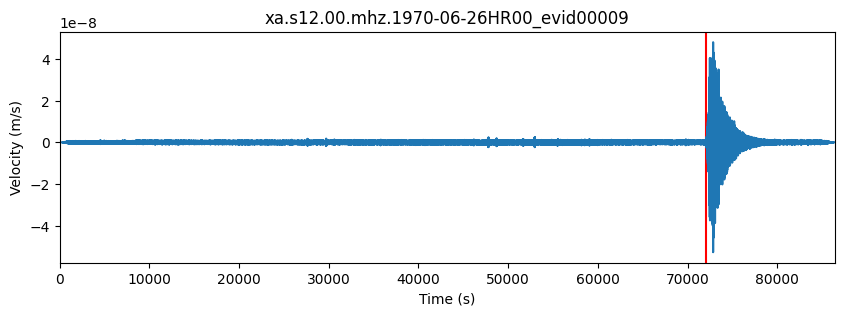

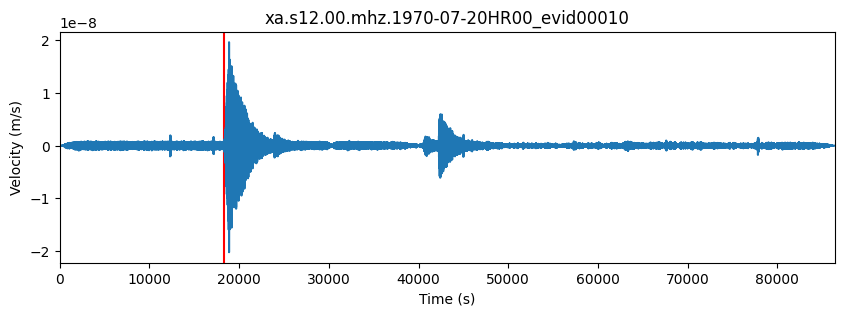

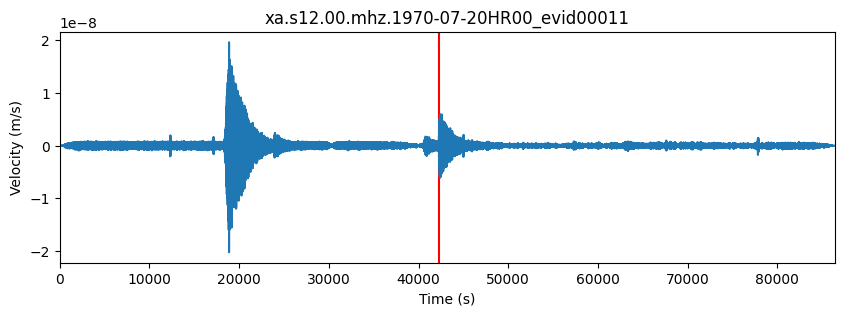

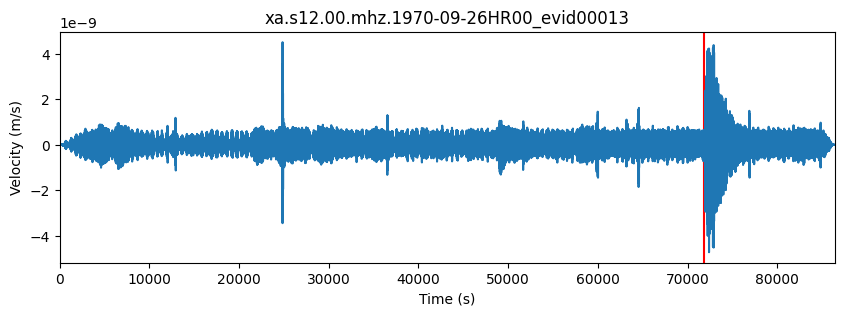

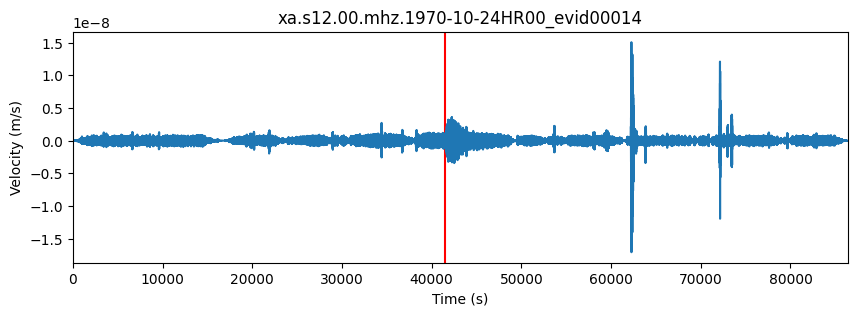

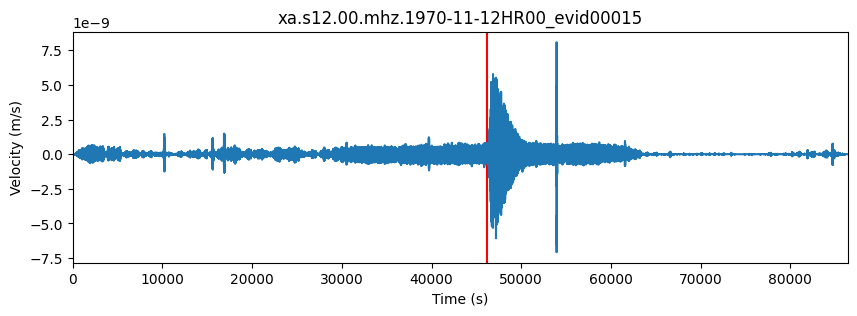

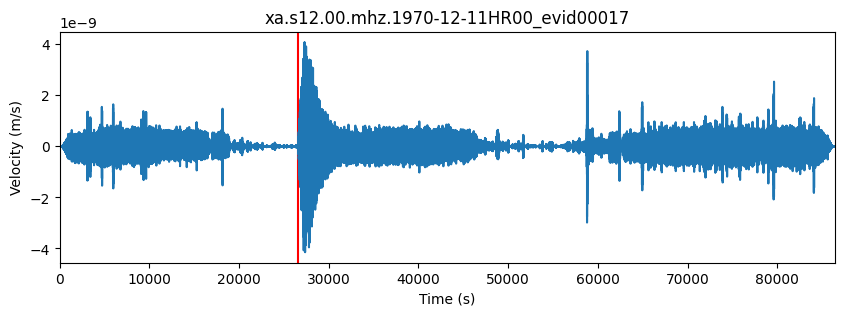

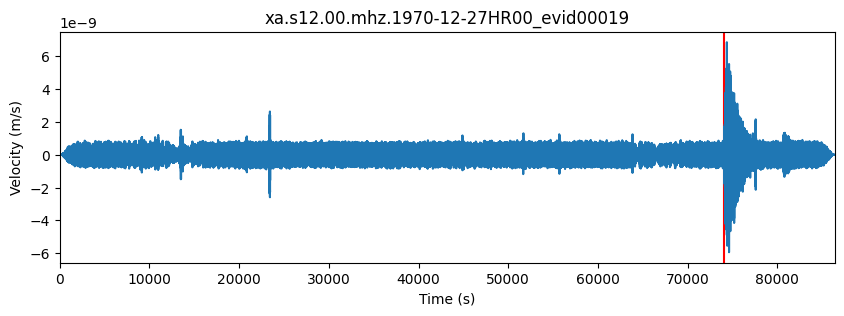

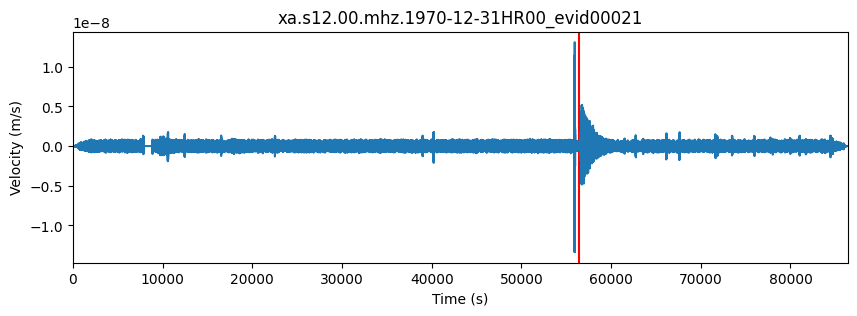

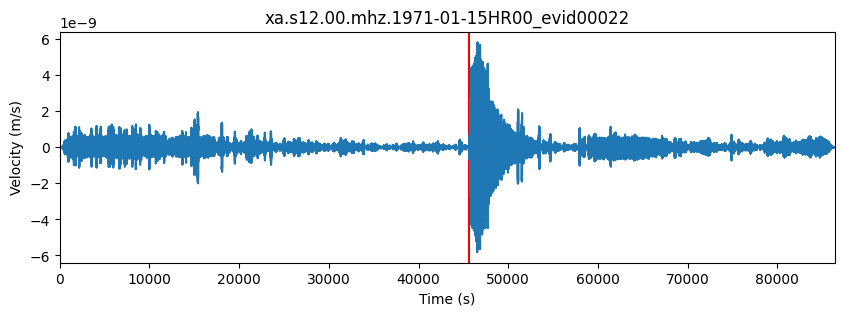

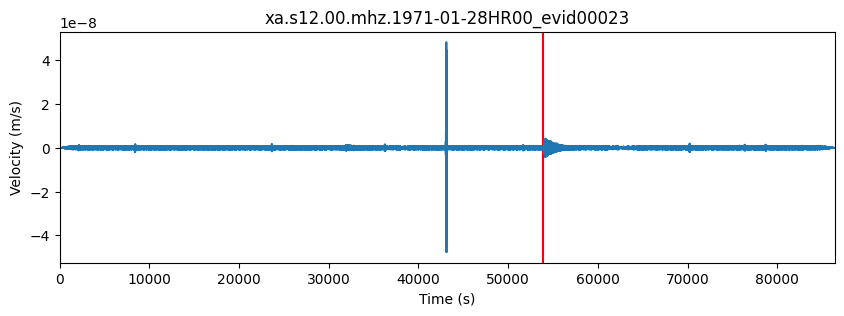

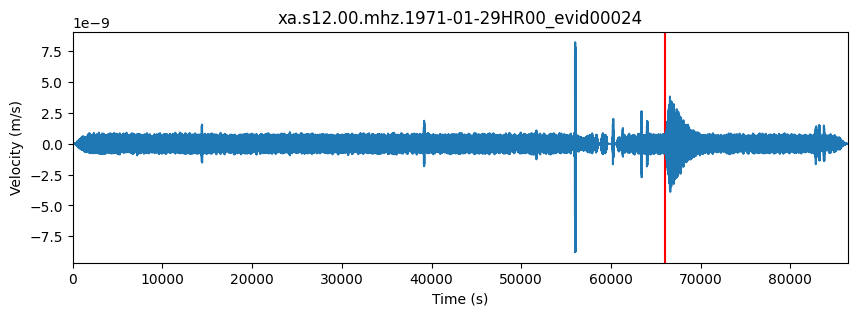

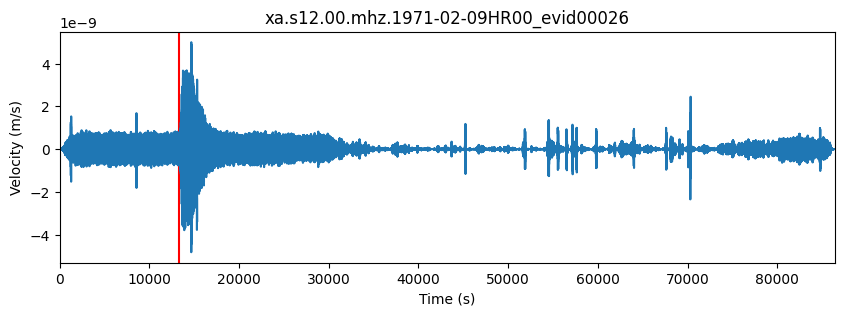

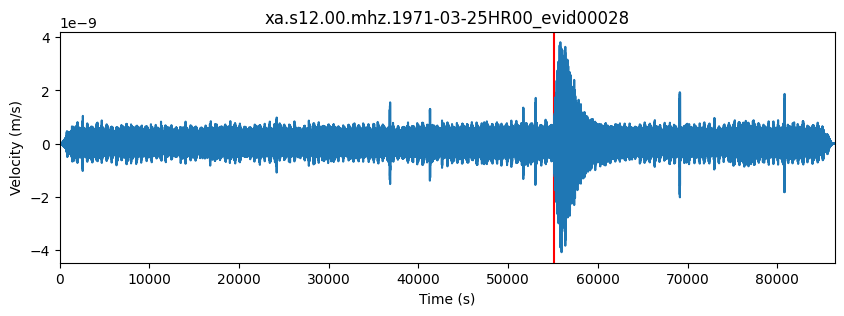

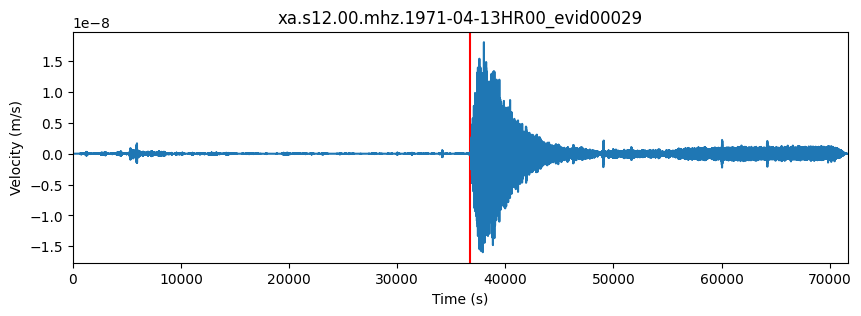

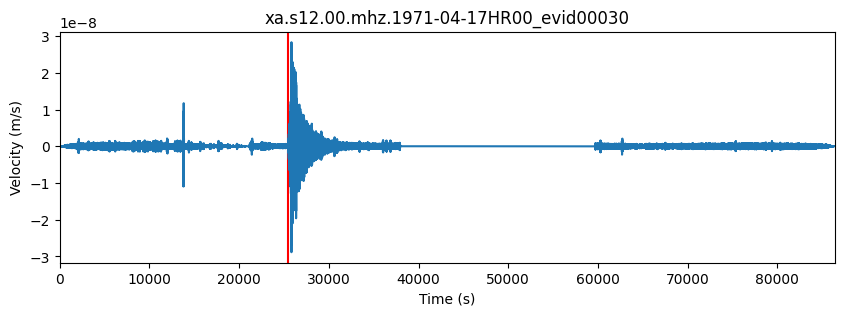

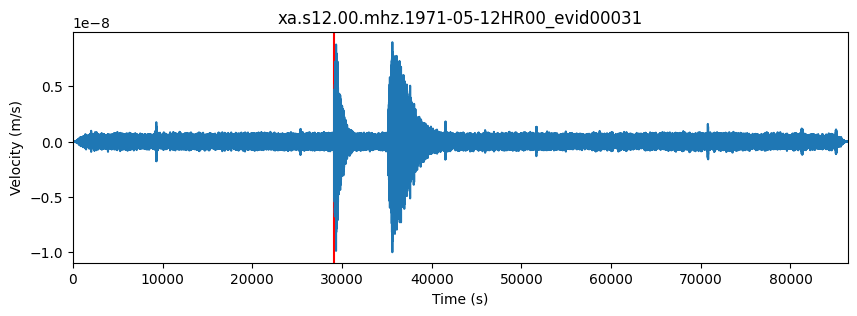

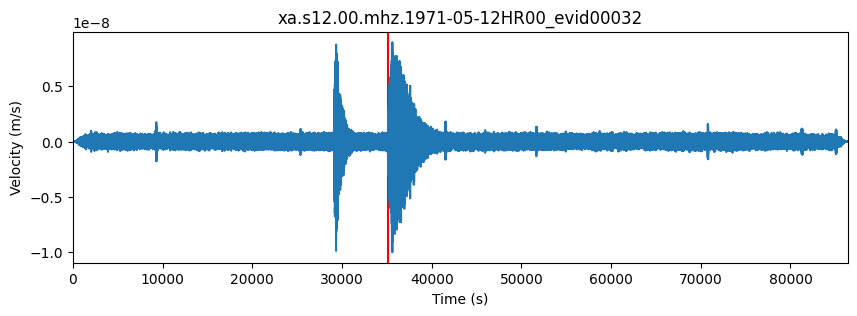

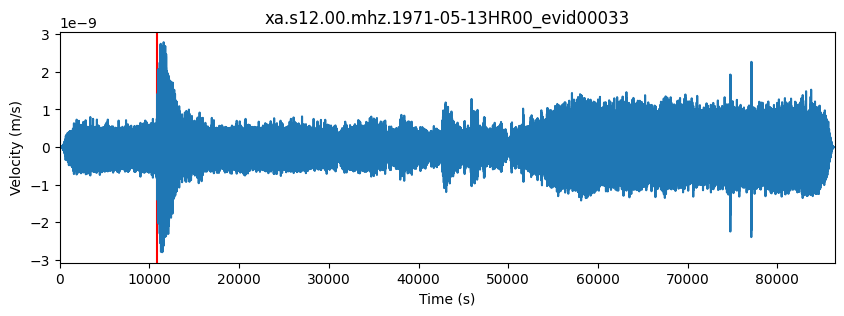

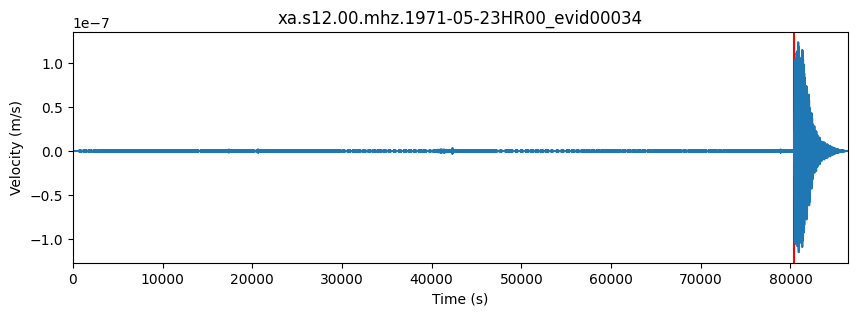

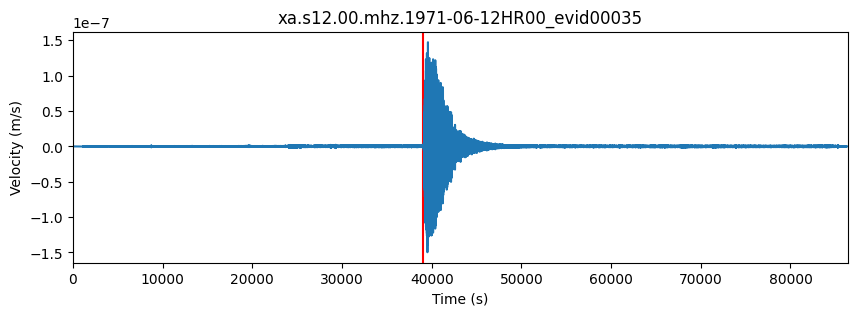

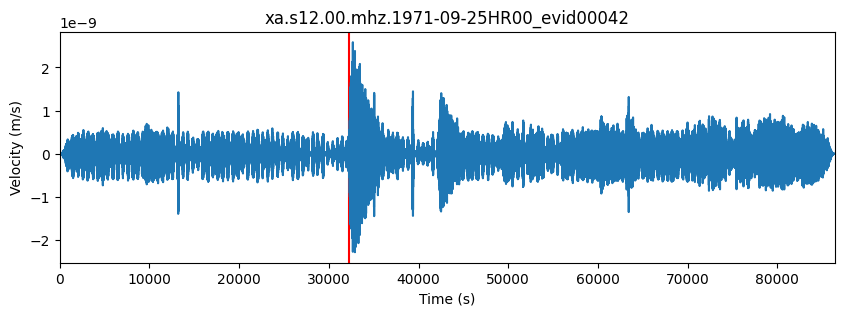

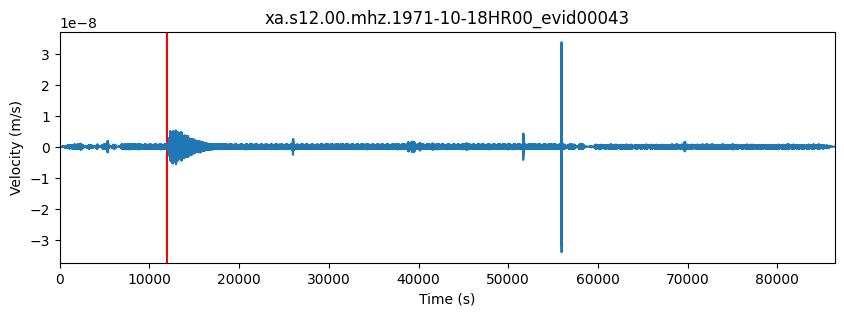

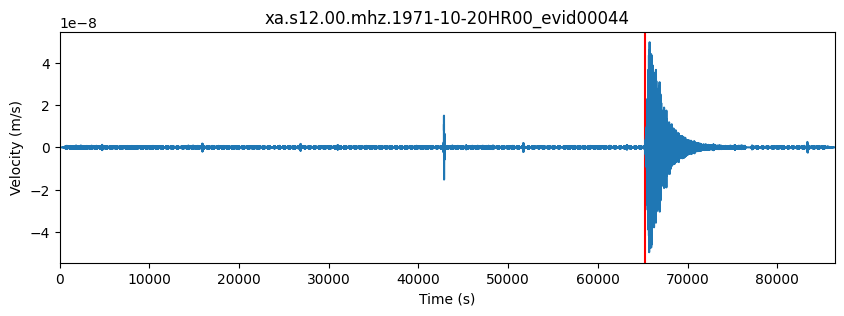

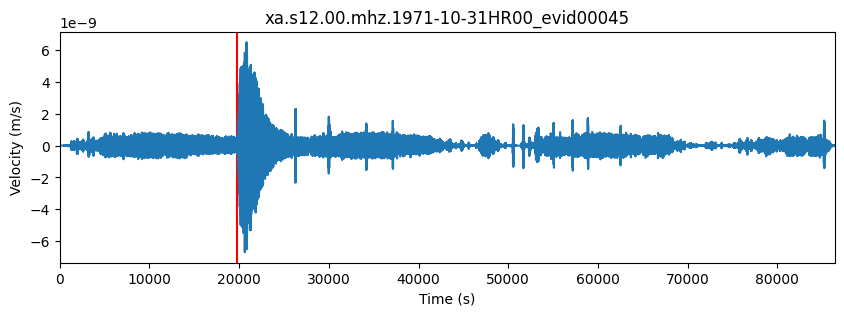

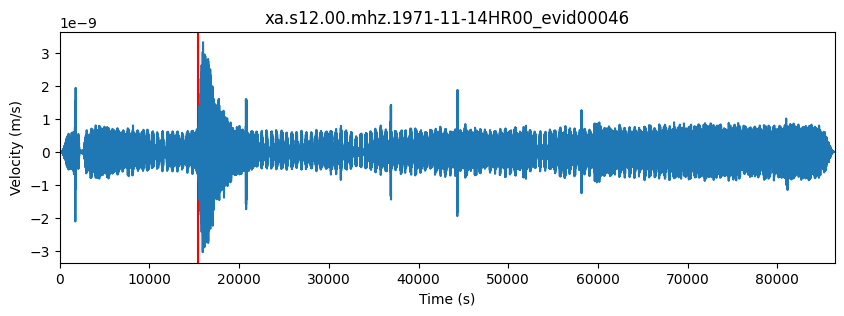

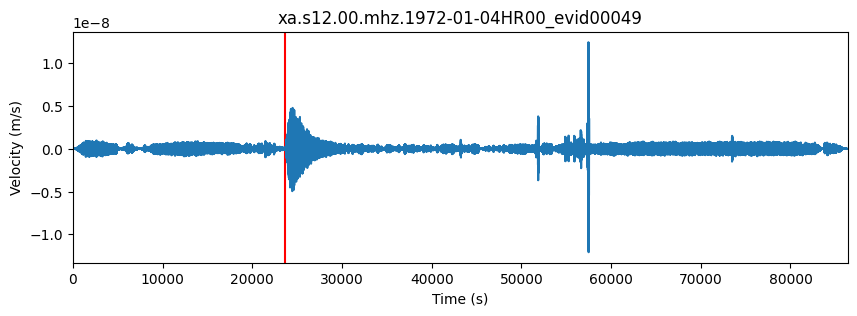

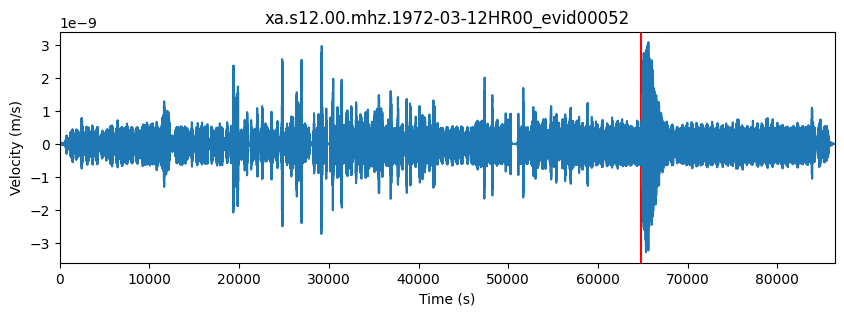

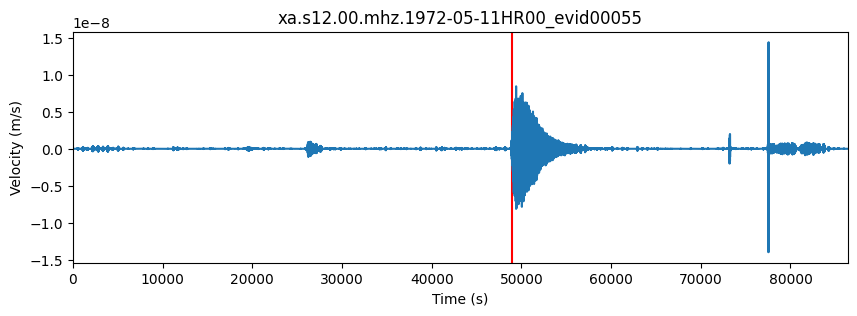

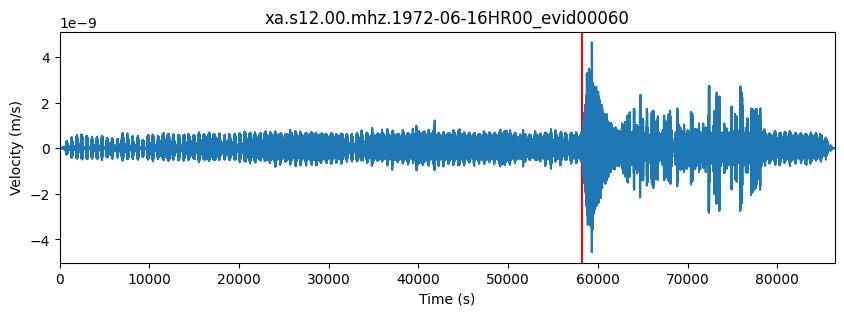

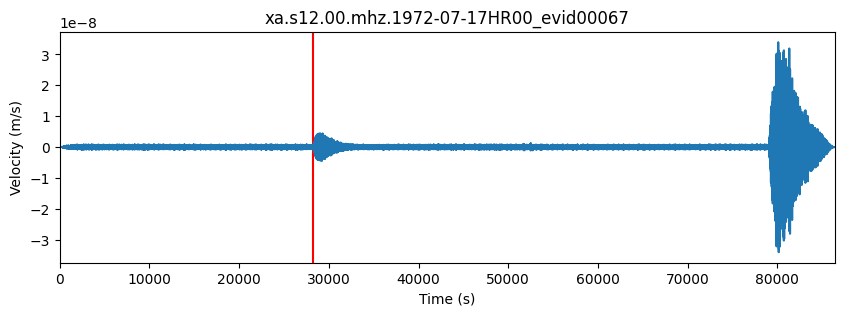

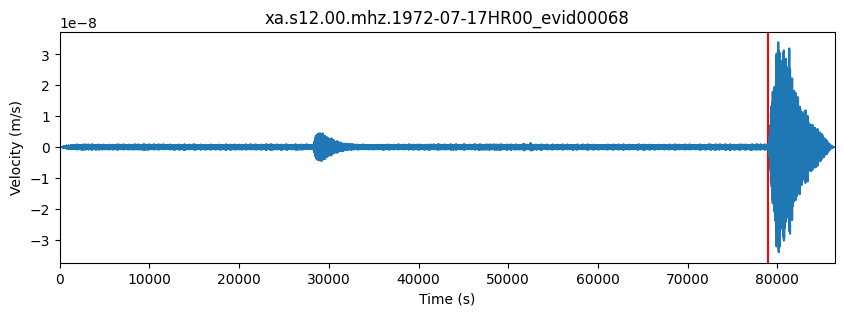

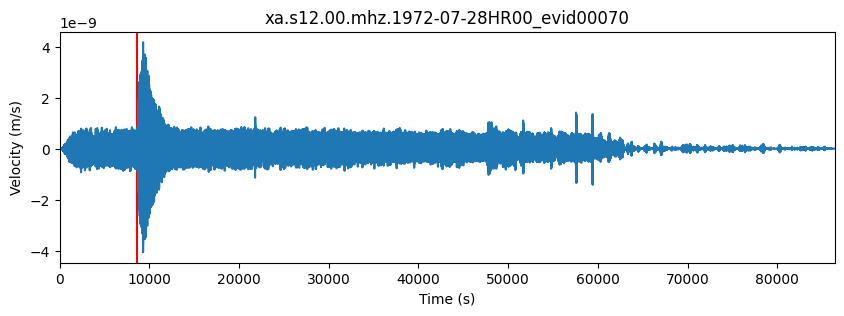

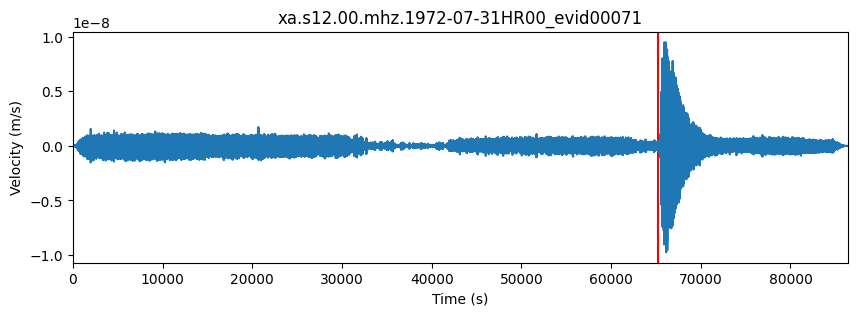

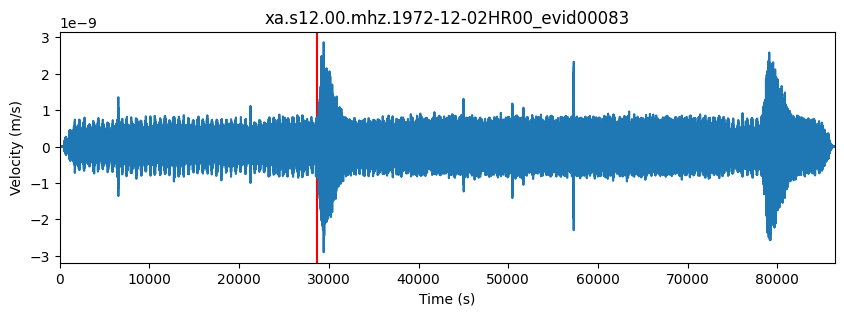

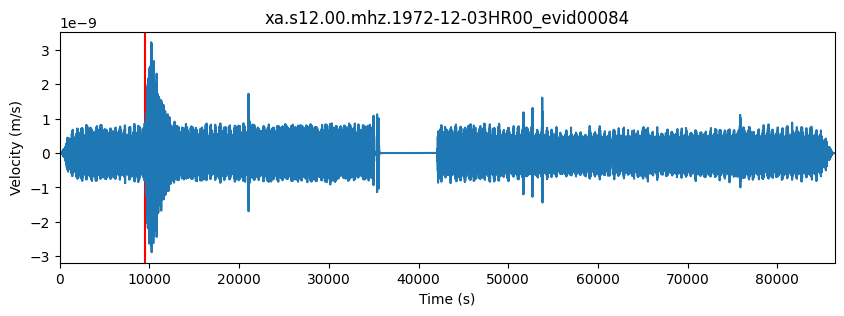

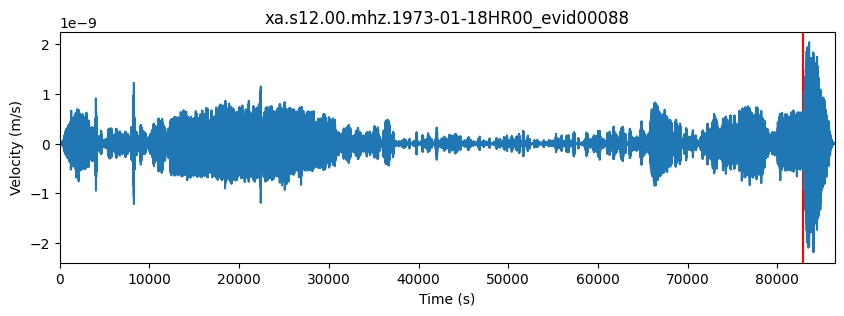

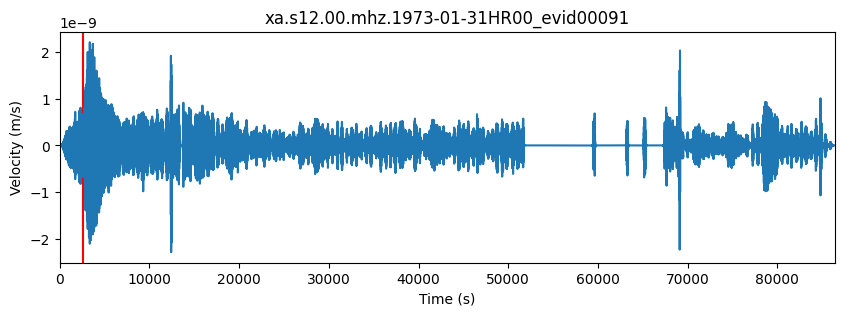

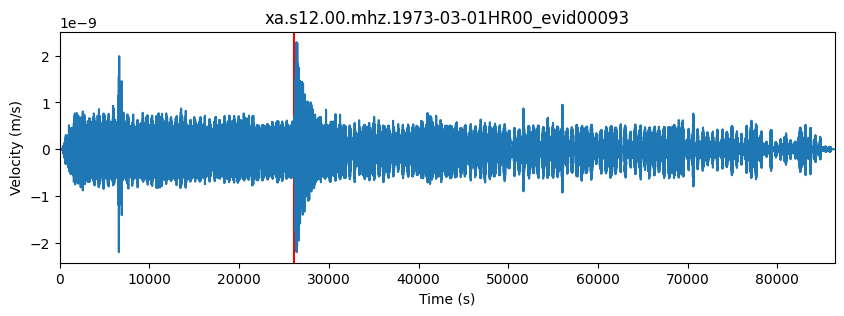

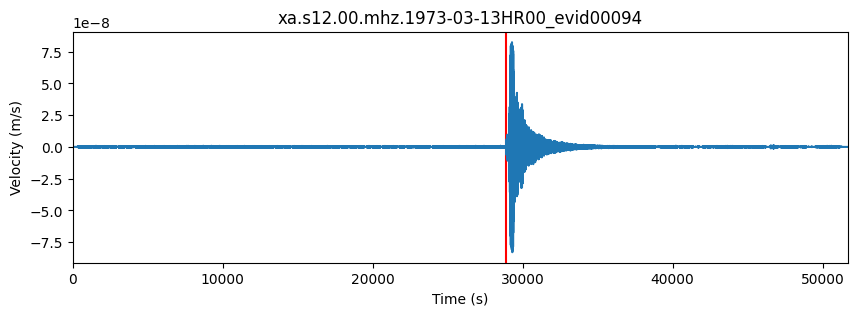

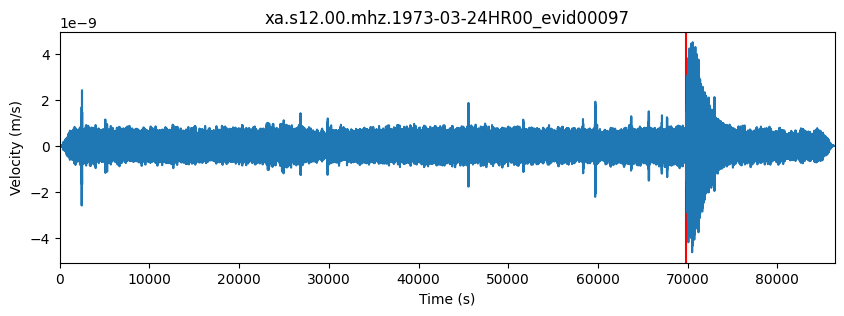

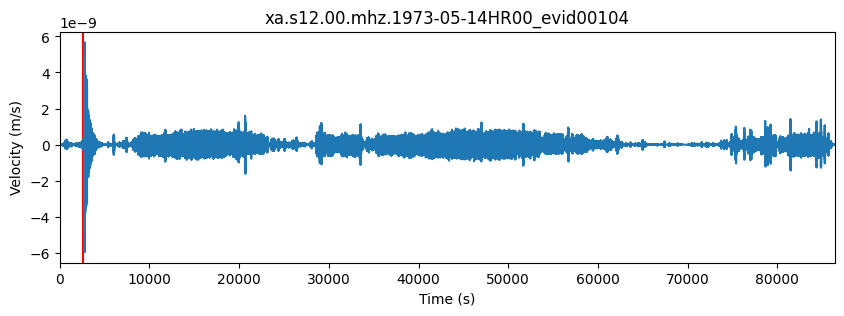

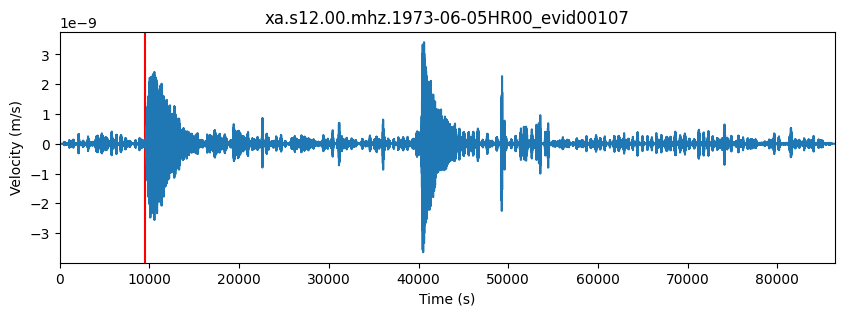

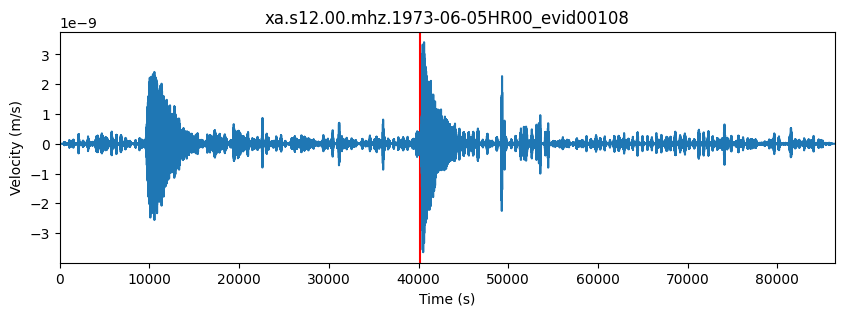

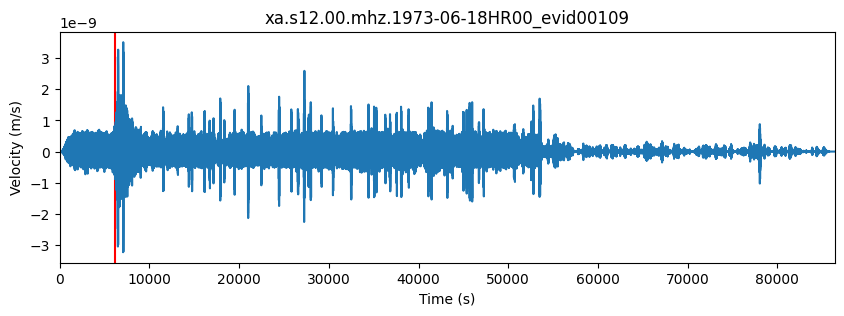

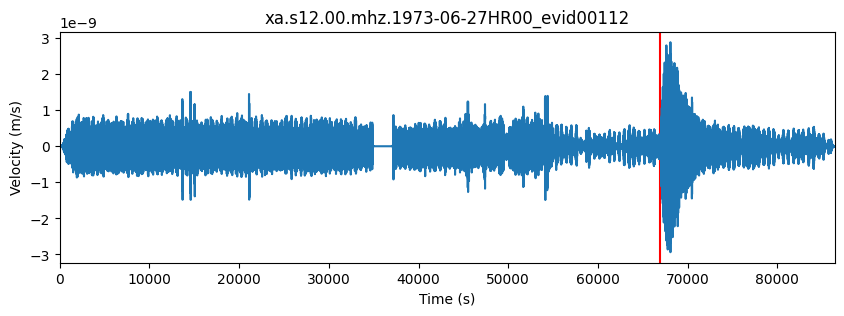

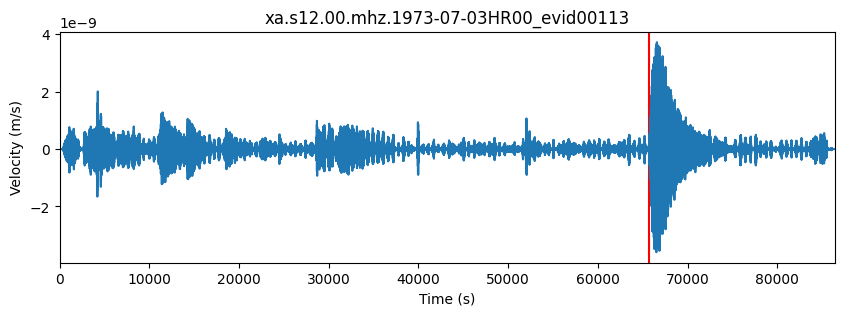

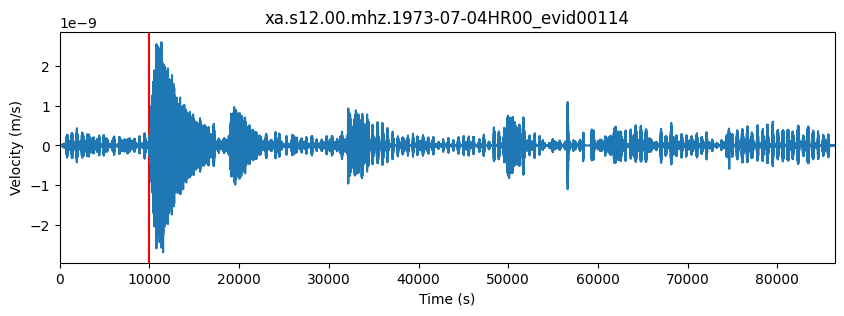

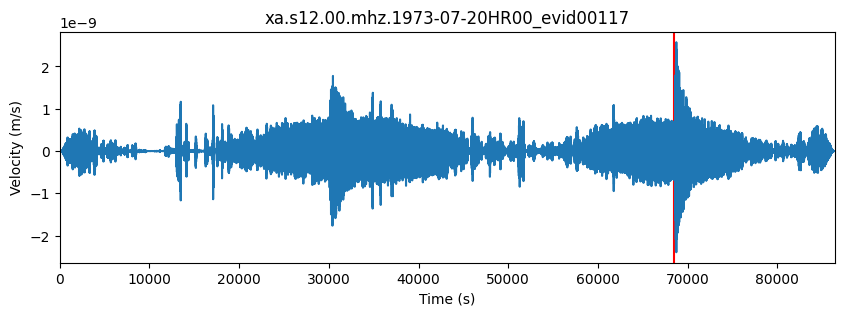

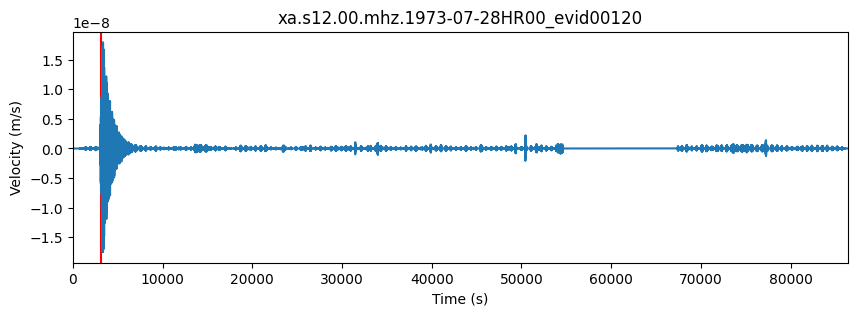

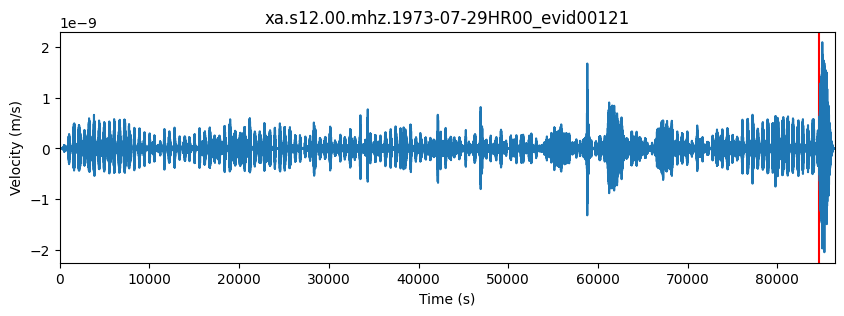

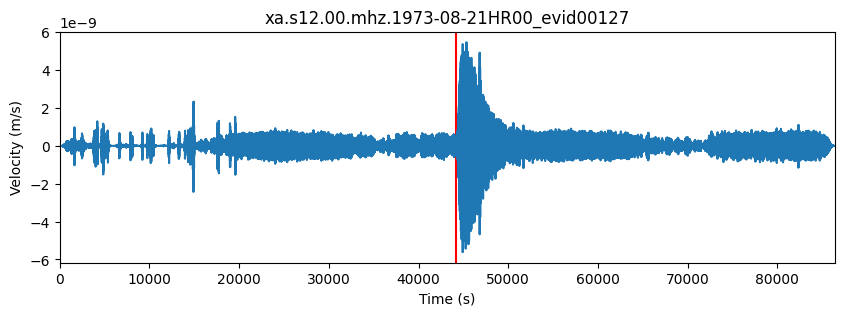

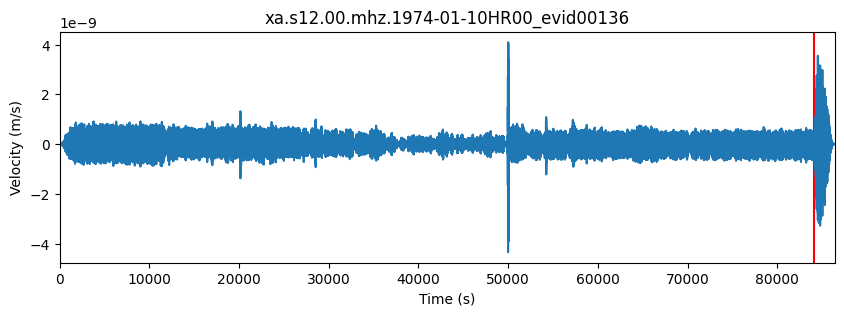

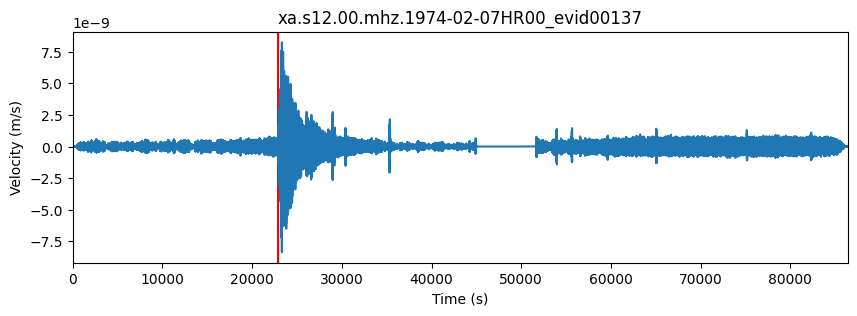

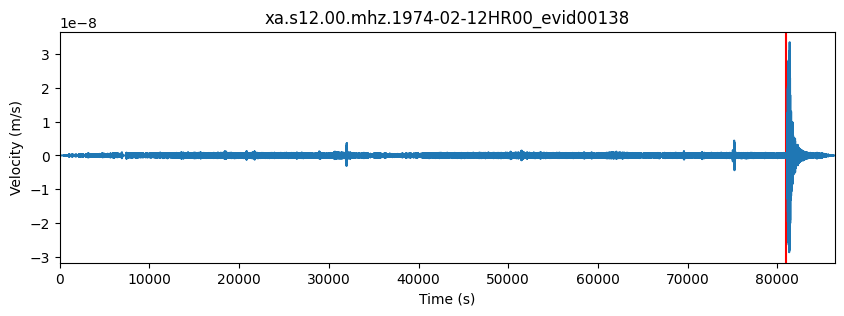

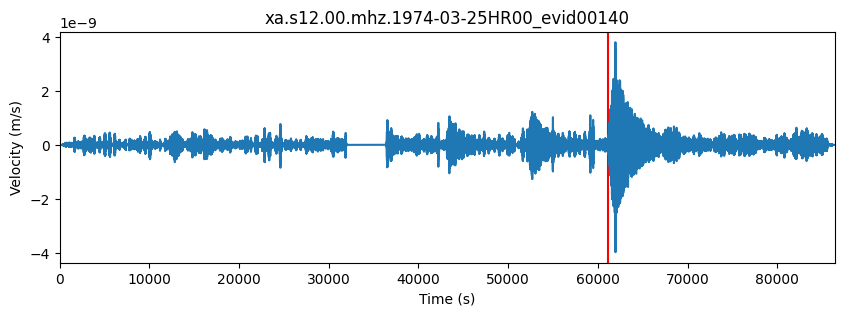

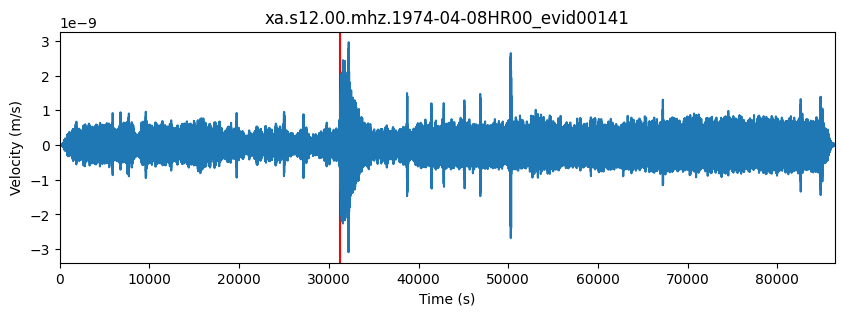

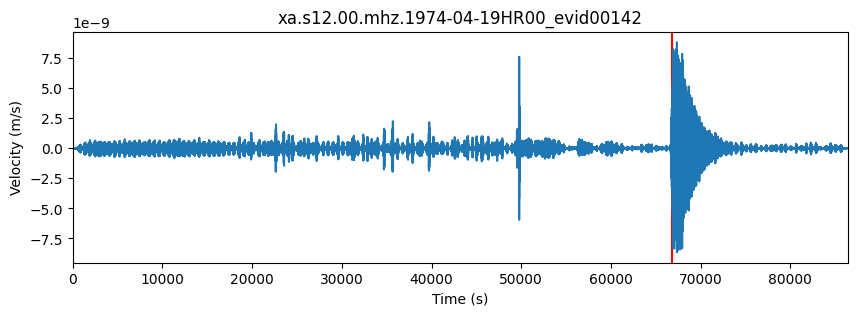

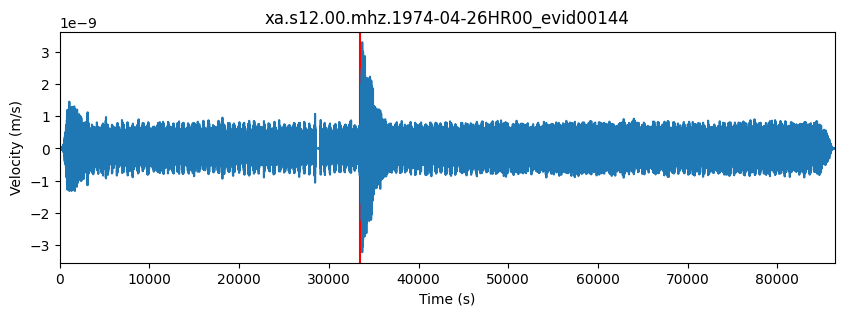

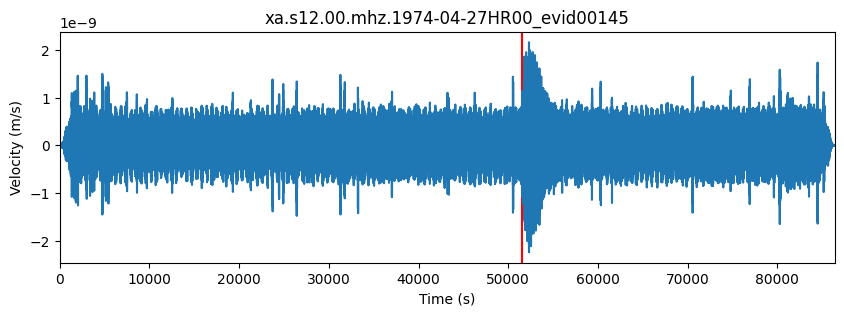

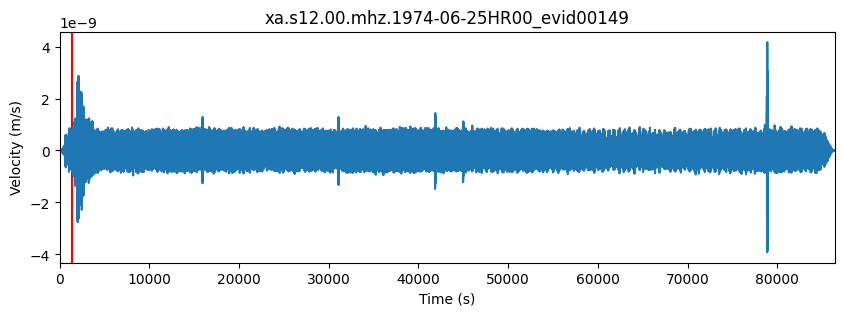

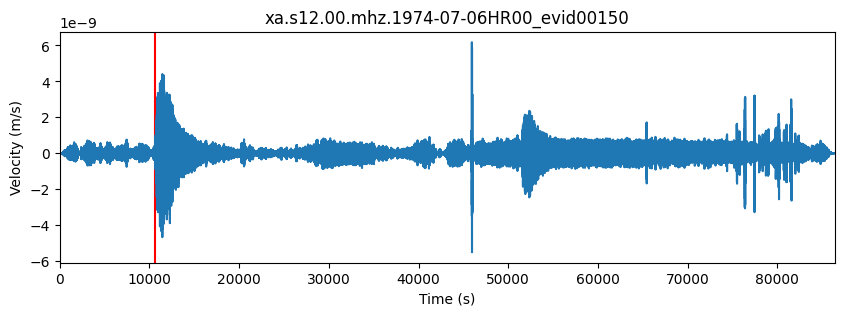

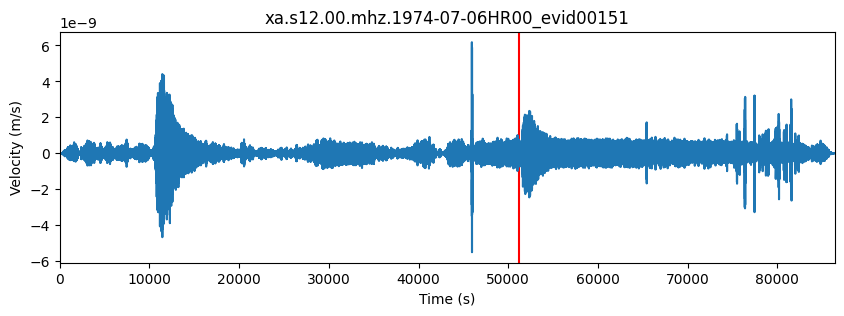

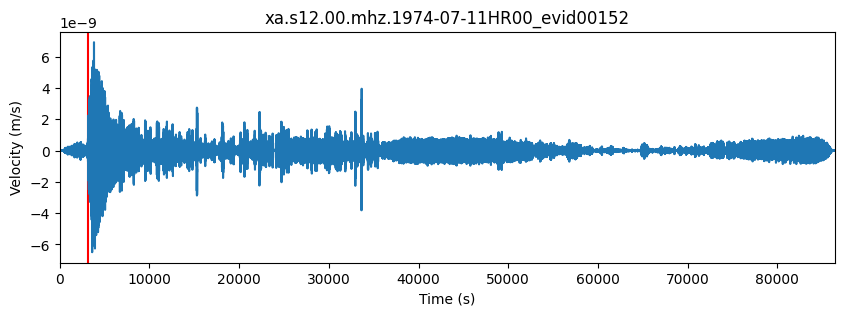

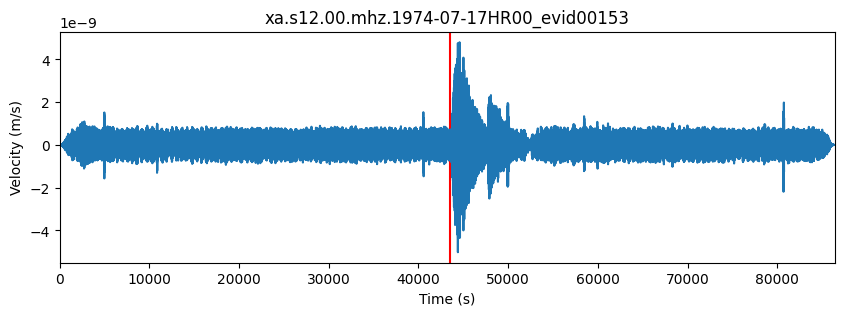

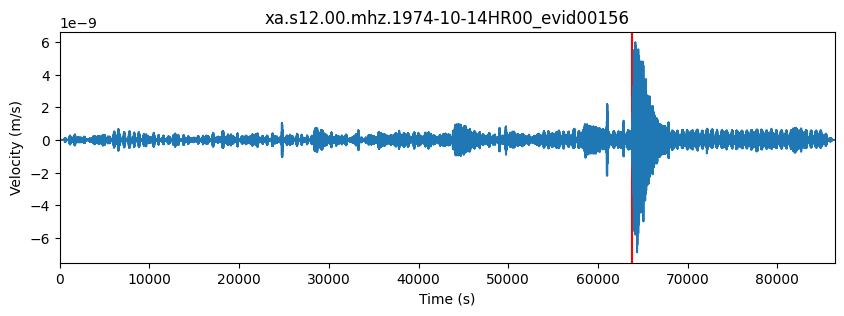

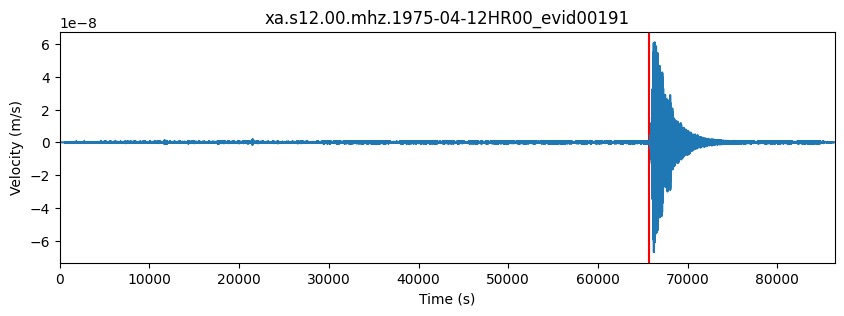

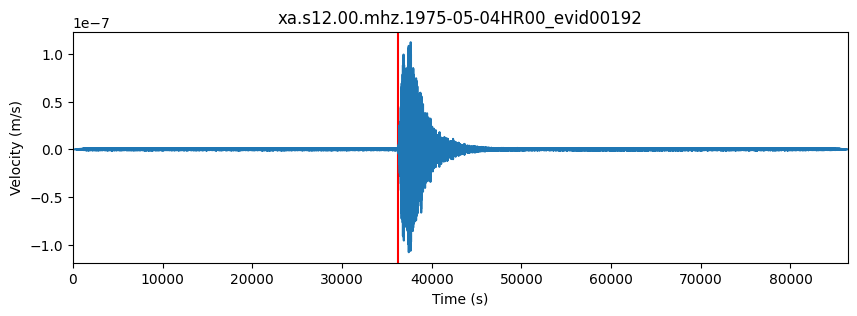

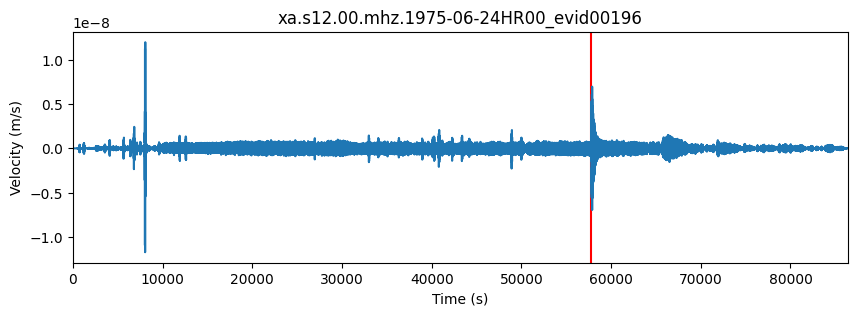

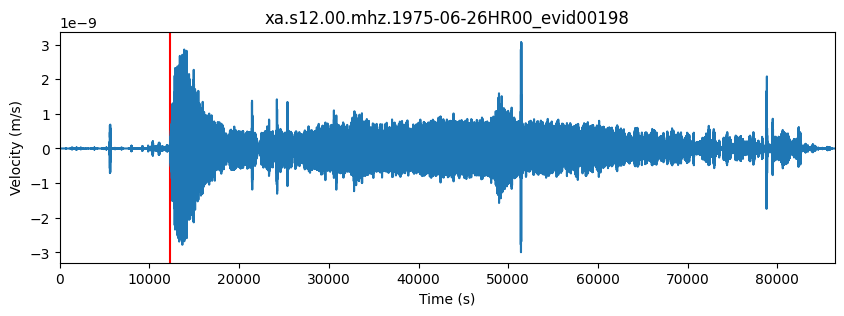

In [8]:
#iterate through files in directory
for row in cat.iterrows():
    filename = row[1]['filename']
    arrival_time = datetime.strptime(row[1]['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
    mseed_file = f'{data_directory}{filename}.mseed'
    st = read(mseed_file)
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data
    
    starttime = tr.stats.starttime.datetime
    arrival = (arrival_time - starttime).total_seconds()

    # Initialize figure
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    # Make the plot pretty
    ax.axvline(x = arrival, color='red',label='Rel. Arrival')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim([min(tr_times),max(tr_times)])
    ax.set_title(f'{filename}')
    ax.plot(tr_times,tr_data)

    # df = tr.stats.sampling_rate

    # cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))

    # on_off = np.array(trigger_onset(cft, thr_on, thr_off))

    # for i in np.arange(0,len(on_off)):
    #     triggers = on_off[i]
    #     ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    #     ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')


    plt.show()